In [1]:
import pandas as pd

# Load dataset (Excel file)
df = pd.read_excel("new updrs data.xlsx")

# Compute min and max for each column
ranges = pd.DataFrame({
    "Feature name": df.columns,
    "Type": ["Integer" if str(df[col].dtype).startswith("int") else 
             "Float" if str(df[col].dtype).startswith("float") else "Categorical"
             for col in df.columns],
    "Value range": [f"{df[col].min()} – {df[col].max()}" for col in df.columns]
})

# Display the table
print(ranges)

# Optionally, save it to Excel/CSV
ranges.to_excel("feature_value_ranges.xlsx", index=False)
ranges.to_csv("feature_value_ranges.csv", index=False)


             Feature name         Type            Value range
0     fundamental_freq_hz        Float       88.333 – 260.105
1             max_freq_hz        Float      102.145 – 588.518
2             min_freq_hz        Float        65.476 – 239.17
3          jitter_percent        Float      0.00168 – 0.03316
4              jitter_abs        Float        7e-06 – 0.00026
5              jitter_rap        Float      0.00068 – 0.02144
6              jitter_ppq        Float      0.00092 – 0.01958
7              jitter_ddp        Float      0.00204 – 0.06433
8                 shimmer        Float      0.00954 – 0.11908
9              shimmer_db        Float          0.085 – 1.302
10           shimmer_apq3        Float      0.00455 – 0.05647
11           shimmer_apq5        Float        0.0057 – 0.0794
12            shimmer_apq        Float      0.00719 – 0.13778
13            shimmer_dda        Float      0.01364 – 0.16942
14                    nhr        Float      0.00065 – 0.31482
15      

In [2]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("new updrs data.xlsx")

# Show basic info to check non-null counts
print(df.info())

# Count missing values per column
missing_per_column = df.isnull().sum()
print("\nMissing values per column:\n", missing_per_column)

# Count total missing values
total_missing = df.isnull().sum().sum()
print("\nTotal missing values in dataset:", total_missing)

# Display rows with missing values (optional)
missing_rows = df[df.isnull().any(axis=1)]
print("\nRows with missing values:\n", missing_rows)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23841 entries, 0 to 23840
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fundamental_freq_hz    23841 non-null  float64
 1   max_freq_hz            23841 non-null  float64
 2   min_freq_hz            23841 non-null  float64
 3   jitter_percent         23841 non-null  float64
 4   jitter_abs             23841 non-null  float64
 5   jitter_rap             23841 non-null  float64
 6   jitter_ppq             23841 non-null  float64
 7   jitter_ddp             23841 non-null  float64
 8   shimmer                23841 non-null  float64
 9   shimmer_db             23841 non-null  float64
 10  shimmer_apq3           23841 non-null  float64
 11  shimmer_apq5           23841 non-null  float64
 12  shimmer_apq            23841 non-null  float64
 13  shimmer_dda            23841 non-null  float64
 14  nhr                    23841 non-null  float64
 15  hn

In [3]:
import pandas as pd

# Load dataset
df = pd.read_excel("new updrs data.xlsx")

# Dictionary to store outliers for each feature
outliers_dict = {}

# Loop through each numeric column
for col in df.select_dtypes(include=["float64", "int64"]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    # Store results
    outliers_dict[col] = outliers

# Example: Print number of outliers per feature
for col, outliers in outliers_dict.items():
    print(f"{col}: {len(outliers)} outliers")


fundamental_freq_hz: 0 outliers
max_freq_hz: 1095 outliers
min_freq_hz: 0 outliers
jitter_percent: 1919 outliers
jitter_abs: 1094 outliers
jitter_rap: 2075 outliers
jitter_ppq: 1928 outliers
jitter_ddp: 2075 outliers
shimmer: 919 outliers
shimmer_db: 1414 outliers
shimmer_apq3: 754 outliers
shimmer_apq5: 1068 outliers
shimmer_apq: 1311 outliers
shimmer_dda: 754 outliers
nhr: 2606 outliers
hnr: 486 outliers
rpde: 0 outliers
dfa: 0 outliers
spread_1: 0 outliers
spread_2: 0 outliers
detrended_fluctuation: 123 outliers
ppe: 165 outliers
age: 606 outliers
test_time: 0 outliers
motor_updrs_score: 0 outliers
total_updrs_score: 0 outliers


✅ Features and both target variables (total_UPDRS & motor_UPDRS) have been separated.
✅ Cleaned data saved as cleaned_new_data.xlsx

📊 Correlation Matrix (Features only):
                    Age       Sex  test_time  Jitter(%)  Jitter(Abs)  \
Age            1.000000  0.855468   0.654156  -0.471415    -0.725727   
Sex            0.855468  1.000000   0.440882  -0.313726    -0.562218   
test_time      0.654156  0.440882   1.000000  -0.520372    -0.570841   
Jitter(%)     -0.471415 -0.313726  -0.520372   1.000000     0.907672   
Jitter(Abs)   -0.725727 -0.562218  -0.570841   0.907672     1.000000   
Jitter:RAP    -0.368476 -0.261836  -0.447956   0.959935     0.839557   
Jitter:PPQ5   -0.460240 -0.310298  -0.437391   0.946077     0.889081   
Jitter:DDP    -0.368523 -0.261899  -0.447935   0.959941     0.839533   
Shimmer       -0.312094 -0.206787  -0.426391   0.593874     0.534236   
Shimmer(dB)   -0.332095 -0.214820  -0.437240   0.625065     0.572527   
Shimmer:APQ3  -0.275895 -0.186020  -0

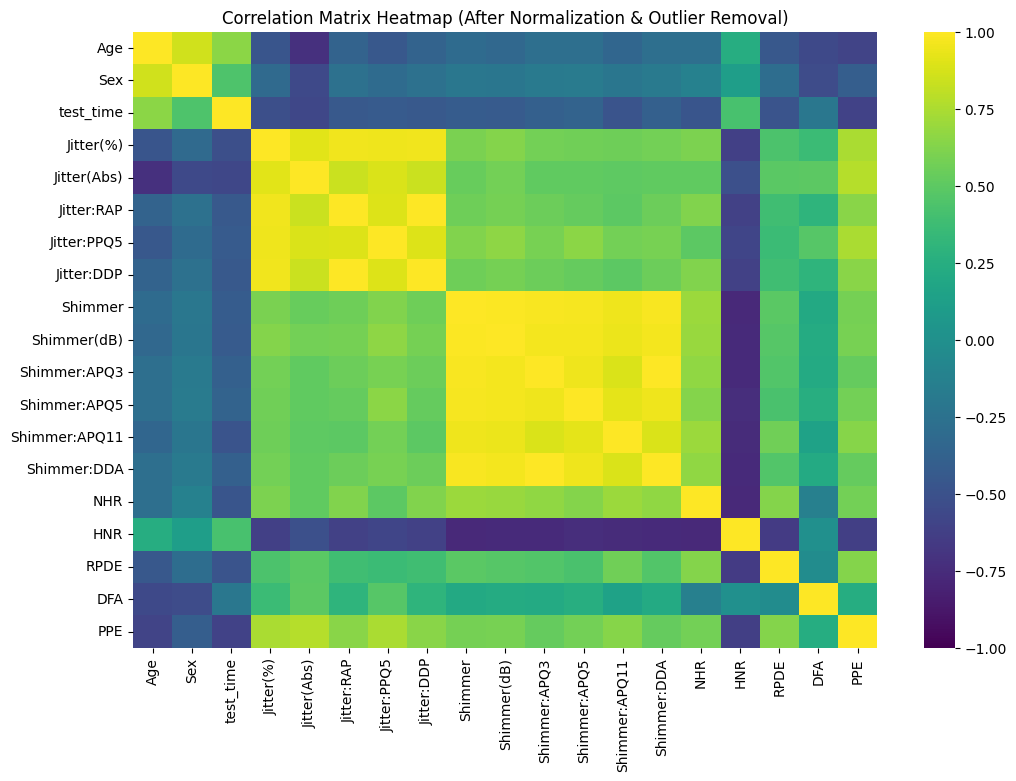


📈 Variance Inflation Factor (VIF) for each feature (after cleaning & normalization):
          Feature           VIF
0             Age  1.385332e+01
1             Sex  5.175812e+00
2       test_time  2.820164e+00
3       Jitter(%)  5.856359e+01
4     Jitter(Abs)  2.466856e+01
5      Jitter:RAP  2.798741e+05
6     Jitter:PPQ5  5.178766e+01
7      Jitter:DDP  2.798744e+05
8         Shimmer  7.492847e+02
9     Shimmer(dB)  7.736043e+01
10   Shimmer:APQ3  8.593518e+06
11   Shimmer:APQ5  7.501695e+01
12  Shimmer:APQ11  6.556265e+01
13    Shimmer:DDA  8.583040e+06
14            NHR  5.904528e+00
15            HNR  5.160605e+00
16           RPDE  3.312825e+00
17            DFA  3.297202e+00
18            PPE  5.445893e+00

⚠️ Features with VIF > 5 (indicating multicollinearity):
          Feature           VIF
0             Age  1.385332e+01
1             Sex  5.175812e+00
3       Jitter(%)  5.856359e+01
4     Jitter(Abs)  2.466856e+01
5      Jitter:RAP  2.798741e+05
6     Jitter:PPQ5  5.178

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# --------------------------
# Step 1: Load dataset
# --------------------------
df = pd.read_excel("new updrs data.xlsx")

# Define feature names (first 19 columns only)
feature_names = ['Age', 'Sex', 'test_time', 'Jitter(%)', 'Jitter(Abs)',
    'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)',
    'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA',
    'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']

# Separate features (first 19 columns) and targets (last 2 columns)
X_features = df.iloc[:, 0:19]       # Features
y_total = df.iloc[:, 19]            # total_UPDRS (20th column)
y_motor = df.iloc[:, 20]            # motor_UPDRS (21st column)

print("✅ Features and both target variables (total_UPDRS & motor_UPDRS) have been separated.")

# --------------------------
# Step 2: Remove outliers by IQR
# --------------------------
def remove_outliers_iqr(data):
    cleaned = data.copy()
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        cleaned = cleaned[(cleaned[col] >= lower) & (cleaned[col] <= upper)]
    return cleaned

X_cleaned = remove_outliers_iqr(X_features)

# Keep targets aligned with cleaned features
df_cleaned = pd.concat([X_cleaned,
                        y_total.loc[X_cleaned.index],
                        y_motor.loc[X_cleaned.index]], axis=1)

# Save cleaned dataset
df_cleaned.to_excel("cleaned_new_data.xlsx", index=False)
print("✅ Cleaned data saved as cleaned_new_data.xlsx")

# --------------------------
# Step 3: Min-Max Normalization (features only)
# --------------------------
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X_cleaned),
                            columns=feature_names,
                            index=X_cleaned.index)

# --------------------------
# Step 4: Pearson Correlation Matrix (PCC)
# --------------------------
corr_matrix = X_normalized.corr(method='pearson')
print("\n📊 Correlation Matrix (Features only):")
print(corr_matrix)

# Optional heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, xticklabels=feature_names,
            yticklabels=feature_names,
            cmap="viridis", vmin=-1, vmax=1, annot=False)
plt.title("Correlation Matrix Heatmap (After Normalization & Outlier Removal)")
plt.show()

# --------------------------
# Step 5: Variance Inflation Factor (VIF)
# --------------------------
X_with_const = add_constant(X_normalized)
vif_values = [variance_inflation_factor(X_with_const.values, i)
              for i in range(1, X_with_const.shape[1])]  # skip constant

vif_df = pd.DataFrame({
    "Feature": feature_names,
    "VIF": vif_values
})

print("\n📈 Variance Inflation Factor (VIF) for each feature (after cleaning & normalization):")
print(vif_df)

print("\n⚠️ Features with VIF > 5 (indicating multicollinearity):")
print(vif_df[vif_df["VIF"] > 5])
